In [120]:
import scipy.integrate as integrate
from scipy.stats import lognorm, gamma
import numpy as np
import matplotlib.pyplot as plt

x_a = 0.1  # beta distrib later
P_a = 0.4  # beta distrib later

def s(t):
    return gamma.pdf(t, 5, 1)  # not a lognorm as recommended but seems to contain most of the idea

    
def beta_s(t):
    if hasattr(t, "__len__"):
        return np.asarray([beta_s(tt) for tt in t])
    return  lognorm.pdf(t, 0.163, 1.644) # is very wrong but can't find the actual shape in the paper
    
def E(t):
    if hasattr(t, "__len__"):
        return np.asarray([E(tt) for tt in t])
    return gamma.pdf(t, 4, scale=1)  # is wrong

    
def beta(t):
    def asymptomatic(t):
        return P_a * x_a * beta_s(t)
    def pre_symptomatic(t):
        return (1-P_a)*(1-s(t))*beta_s(t)
    def symptomatic(t):
        return (1-P_a)*s(t)*beta_s(t)
    def environmental(t):
        if hasattr(t, "__len__"):
            return np.asarray([environmental(tt) for tt in t])
        return integrate.quad(lambda l: beta_s(t-l)*E(l), 0, t)[0]
    a = asymptomatic(t)
    p = pre_symptomatic(t)
    ss = symptomatic(t)
    e = environmental(t)
    return a + p + ss + e
    
t = np.arange(0, 30, 0.2)


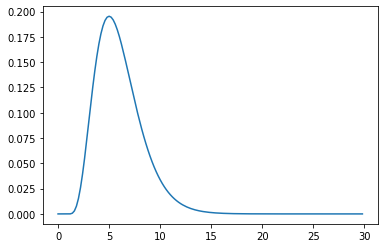

In [121]:
_s = s(t)
_ = plt.plot(t, _s)

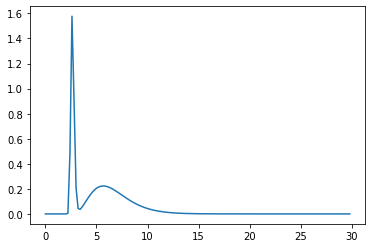

In [122]:
y = beta(t)
_ = plt.plot(t, y)